# Understanding Student Dropout Trends: An Exploratory Analysis

<img src="./drop_sc.png" alt="Image description" width="700">


### Loading necesessary libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

### Exploratory Data Analysis (EDA)

In [85]:
df = pd.read_csv('./student_data.csv')
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,School A,Female,13.0,Urban,1.0,Together,Primary,Secondary,Business,Healthcare,Reputation,Mother,14.0,5.0,0,No,Yes,Yes,No,No,Yes,No,Yes,Bad,5.0,4.0,Low,Low,Very Bad,1,16.0,14.0,16.0,Yes
1,School C,Female,14.0,Suburban,4.0,Apart,Higher,NaN,Service,Education,Course,Mother,7.0,4.0,0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Very Bad,3.0,1.0,Very High,NaN,Good,3,15.0,16.0,15.0,No
2,School C,Female,18.0,Rural,5.0,Apart,NaN,Primary,Business,Unemployed,Course,Father,NaN,1.0,0,No,No,Yes,Yes,No,No,No,Yes,Bad,2.0,5.0,Very High,Medium,Excellent,0,17.0,13.0,8.0,Yes
3,School B,Other,18.0,Suburban,7.0,Apart,Secondary,Secondary,Business,Technology,Home,Other,41.0,4.0,1,No,No,Yes,No,Yes,Yes,No,Yes,Good,5.0,NaN,Low,NaN,Good,6,NaN,16.0,16.0,No
4,School A,Other,16.0,Suburban,8.0,Apart,Higher,NaN,Unemployed,Education,Other,Father,39.0,7.0,2,Yes,No,Yes,No,Yes,No,No,No,Very Bad,4.0,4.0,NaN,Low,Bad,2,16.0,13.0,15.0,No


In [86]:
print("This dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

This dataset has 20000 rows and 34 columns


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School                       20000 non-null  object 
 1   Gender                       20000 non-null  object 
 2   Age                          18977 non-null  float64
 3   Address                      20000 non-null  object 
 4   Family_Size                  19008 non-null  float64
 5   Parental_Status              20000 non-null  object 
 6   Mother_Education             14876 non-null  object 
 7   Father_Education             14986 non-null  object 
 8   Mother_Job                   20000 non-null  object 
 9   Father_Job                   20000 non-null  object 
 10  Reason_for_Choosing_School   20000 non-null  object 
 11  Guardian                     20000 non-null  object 
 12  Travel_Time                  18990 non-null  float64
 13  Study_Time      

In [44]:
print("There are {} columns wiht missing data.".format(len((df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0])))

There are 13 columns wiht missing data.


In [45]:
(df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0]


Age                             5.115
Family_Size                     4.960
Mother_Education               25.620
Father_Education               25.070
Travel_Time                     5.050
Study_Time                      5.095
Free_Time                       5.230
Going_Out                       4.990
Weekend_Alcohol_Consumption    19.885
Weekday_Alcohol_Consumption    20.155
Grade_1                         5.050
Grade_2                         5.075
Final_Grade                     5.030
dtype: float64

#### Visualizing the percentage of missing values in each column.

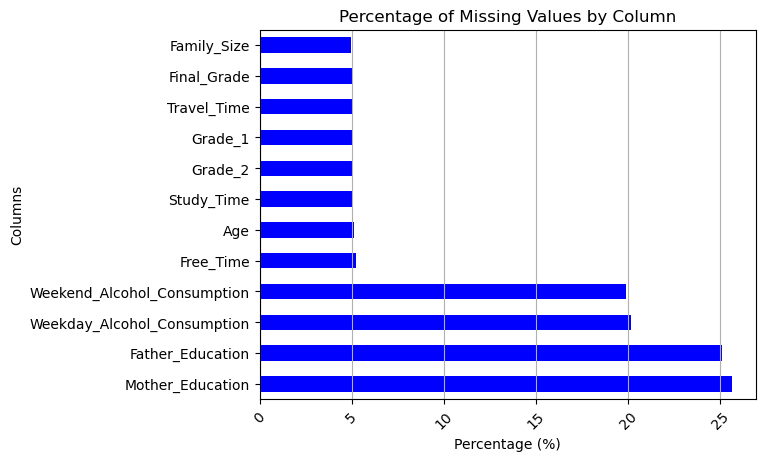

In [69]:
missing_percentage = (df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0].sort_values(ascending=False)
missing_percentage.plot(kind='barh', color='blue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage (%)')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

#### Isolating categorical features

In [47]:
df.select_dtypes(include='object').columns

Index(['School', 'Gender', 'Address', 'Parental_Status', 'Mother_Education',
       'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'School_Support',
       'Family_Support', 'Extra_Paid_Class', 'Extra_Curricular_Activities',
       'Attended_Nursery', 'Wants_Higher_Education', 'Internet_Access',
       'In_Relationship', 'Family_Relationship', 'Weekend_Alcohol_Consumption',
       'Weekday_Alcohol_Consumption', 'Health_Status', 'Dropped_Out'],
      dtype='object')

In [57]:
print("At a first glance, there are {} categorical features.".format(len(df.select_dtypes(include='object').columns)))

At a first glance, there are 23 categorical features.


#### Isolating quantitative features

In [58]:
df.select_dtypes(exclude='object').columns

Index(['Age', 'Family_Size', 'Travel_Time', 'Study_Time', 'Number_of_Failures',
       'Free_Time', 'Going_Out', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade'],
      dtype='object')

In [60]:
print("At a first glance, there are {} categorical features.".format(len(df.select_dtypes(exclude='object').columns)))

At a first glance, there are 11 categorical features.


#### However Going_Out should be a categorical feature since it shows a scale of values.

In [61]:
df['Going_Out'] = df['Going_Out'].astype('str')

In [77]:
numeric_cols = df.select_dtypes(exclude='object').columns
df[numeric_cols].describe()

,Age,Family_Size,Travel_Time,Study_Time,Number_of_Failures,Free_Time,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,18977.000000,19008.000000,18990.000000,18981.000000,20000.000000,18954.000000,20000.000000,18990.000000,18985.000000,18994.000000
mean,15.486378,4.498580,19.581411,3.511828,0.152050,2.997679,2.507500,13.794892,13.786516,13.806202
std,1.527998,2.285508,20.036377,2.830779,0.418974,1.414174,2.991988,3.191949,3.206739,3.217748
min,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
25%,14.000000,3.000000,5.000000,1.000000,0.000000,2.000000,0.000000,12.000000,12.000000,12.000000
50%,15.000000,5.000000,14.000000,3.000000,0.000000,3.000000,2.000000,14.000000,14.000000,14.000000
75%,17.000000,6.000000,27.000000,5.000000,0.000000,4.000000,4.000000,16.000000,16.000000,16.000000
max,21.000000,8.000000,245.000000,27.000000,5.000000,5.000000,30.000000,19.000000,19.000000,19.000000


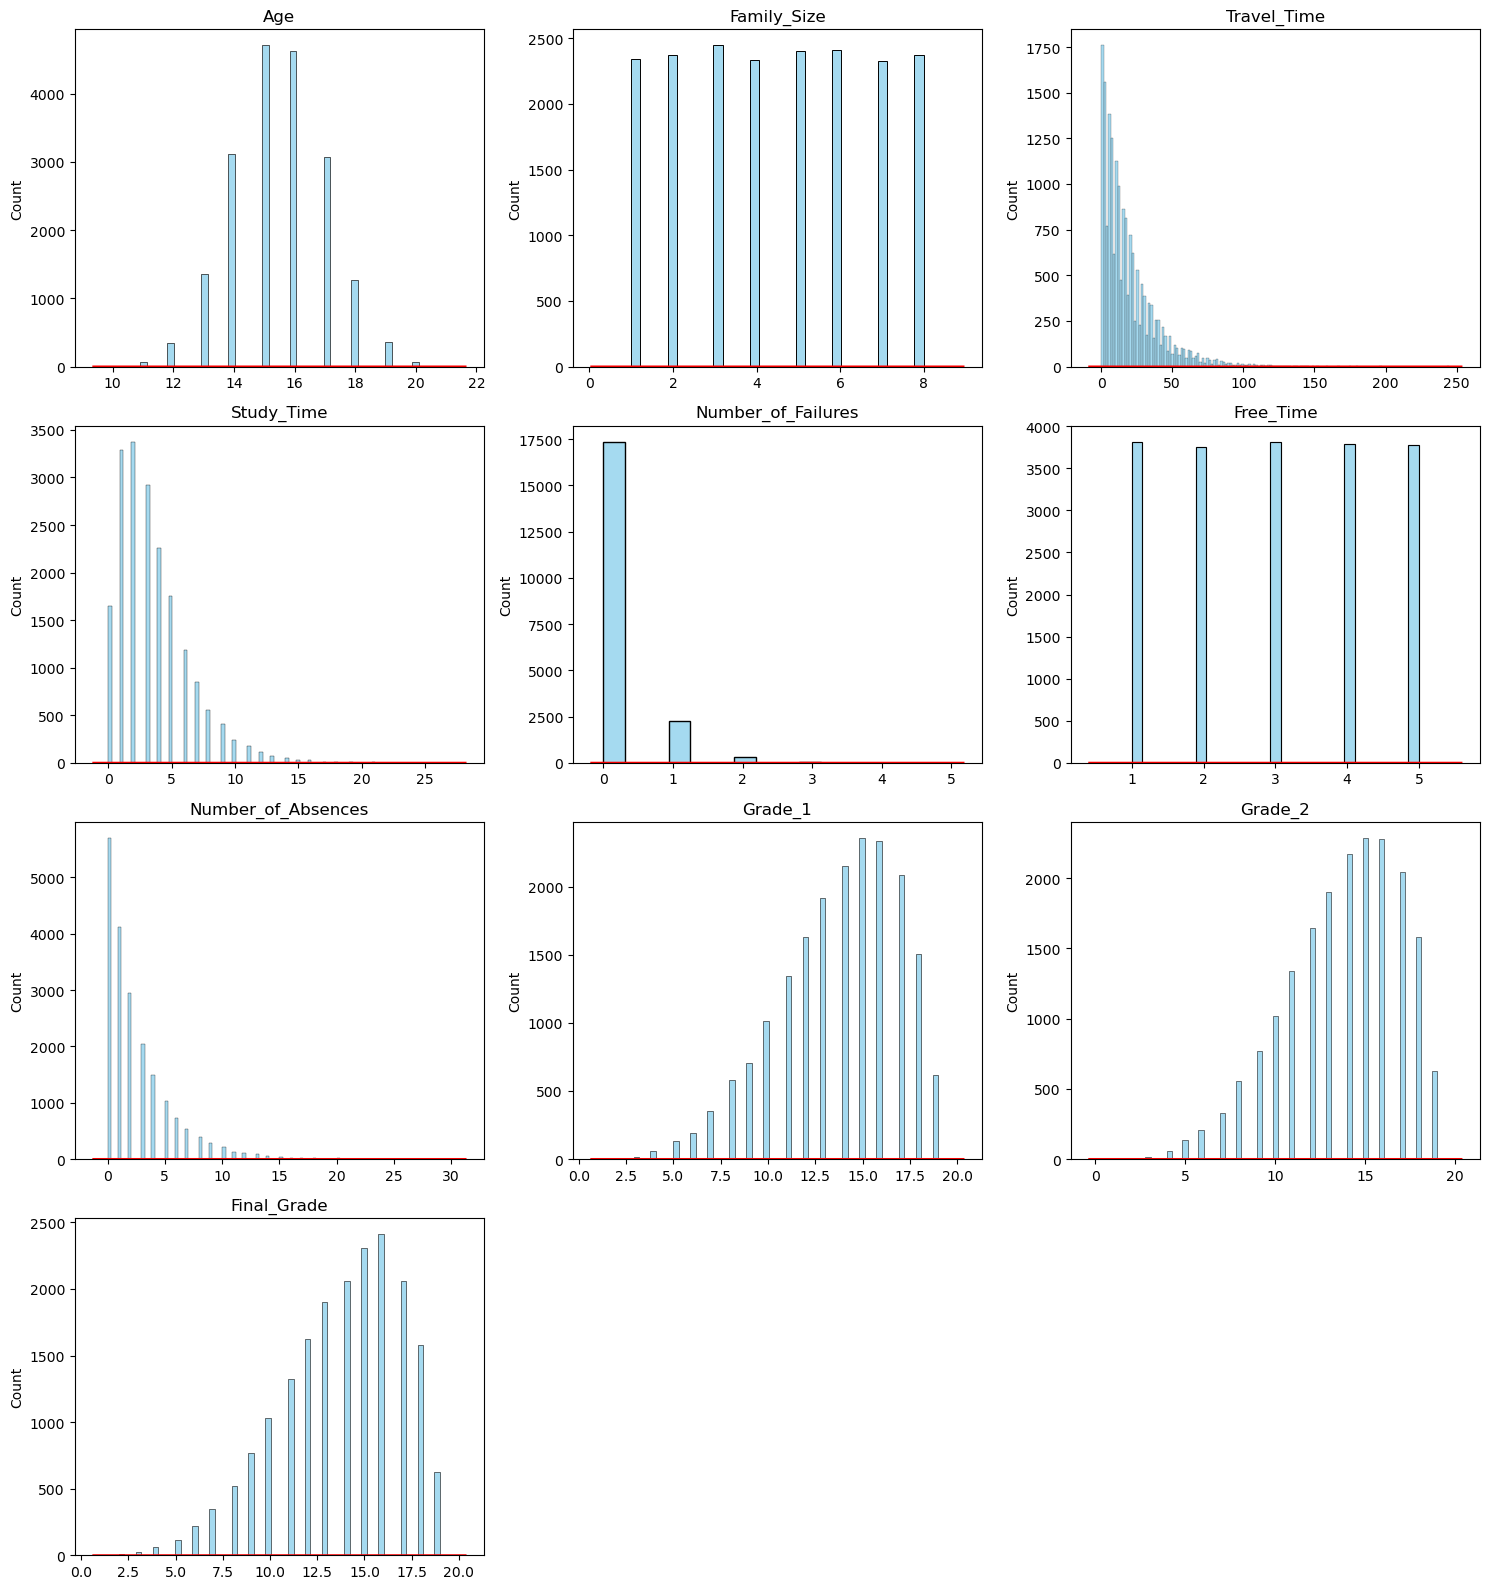

In [73]:


# Set number of columns and rows for the plot grid
n_cols = 3
n_rows = (len(numeric_cols) - 1) // n_cols + 1

# Create a large figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Flatten the axes array (in case it's 2D)
axes = axes.flatten()

# Plot histograms with separate KDE for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], color='skyblue')
    sns.kdeplot(data=df, x=col, ax=axes[i], color='red')
    axes[i].set_title(col)
    axes[i].set_xlabel('')  # Remove redundant x-labels

# Remove any unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show();